In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:/Data Science/DataTrained/Evaluation_Projects/avocado.csv")

data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.shape

(18249, 14)

In [4]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
data = data.drop('Unnamed: 0', axis=1)

data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### Data Dictionary: 
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- Total Bags - Total number of Bags sold
- Small Bags - Total number of Small Bags sold
- Large Bags - Total number of Large Bags sold
- XLarge Bags - Total number of XLarge Bags sold

In [8]:
data.rename(columns = {'Total Volume': 'Total_Volume',
                       '4046':'PLU4046',
                       '4225':'PLU4225',
                       '4770':'PLU4770',
                      'Total Bags':'Total_Bags',
                      'Small Bags':'Small_Bags',
                      'Large Bags':'Large_Bags',
                      'XLarge Bags':'XLarge_Bags'}, inplace = True)

data.head()

,Date,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
data.describe()

,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### Data Visualization

- UniVariate Analysis

Categorical Features:
1. Type
2. Region

All other remaining features are continuous in nature.

In [10]:
data.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

<AxesSubplot:xlabel='year', ylabel='count'>

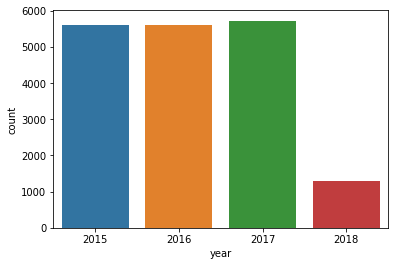

In [11]:
sns.countplot(data['year'])

Year 2018, has less data points compared to other years, let's check the average price of Avocado yearwise in Bivariate Analysis.

In [12]:
data.type.unique()

array(['conventional', 'organic'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

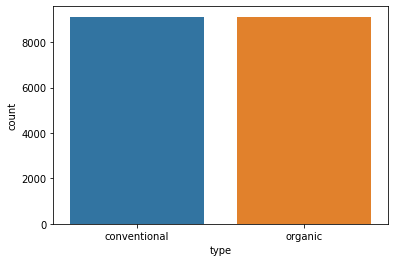

In [13]:
sns.countplot(data['type'])

In [14]:
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

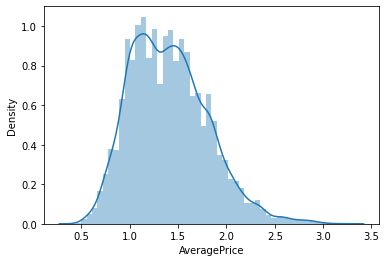

In [15]:
sns.distplot(data['AveragePrice'])

Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.

In [16]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [17]:
data.head()

,Date,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


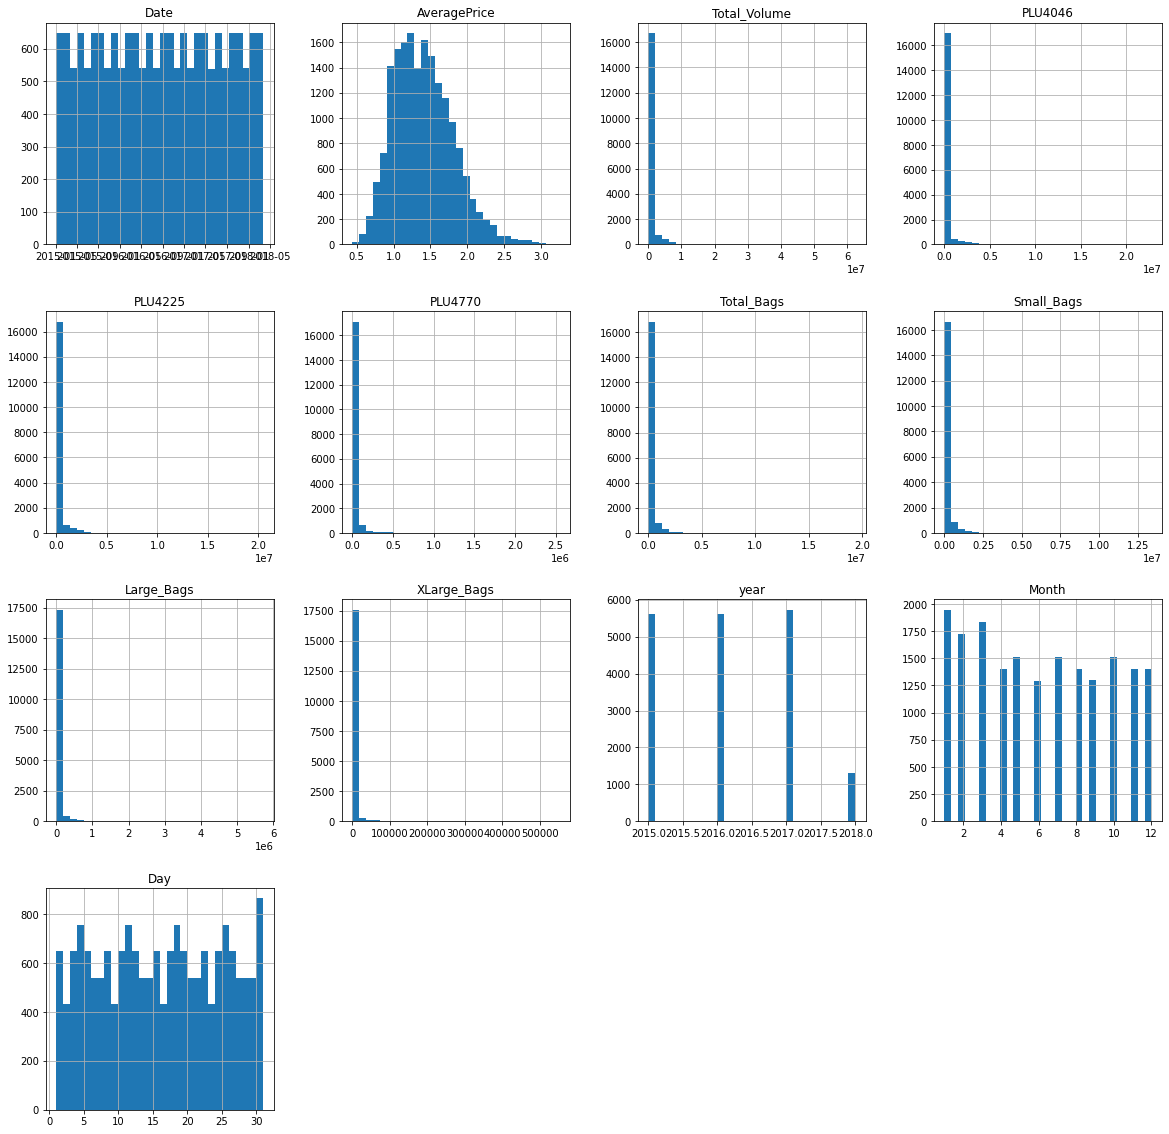

In [18]:
data.hist(figsize = (20,20), grid = True, layout = (4,4), bins = 30)
plt.show()

##### Observations:
1. Average Price column seems to be normally distributed.
2. All other columns seems to be having some skewness.

###### Bivariate Analysis

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

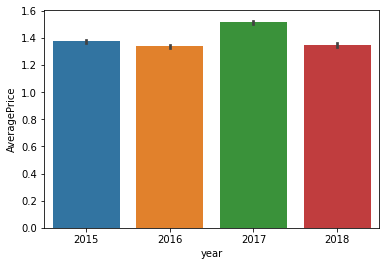

In [19]:
sns.barplot(x='year', y='AveragePrice', data = data)

We can see that, Year 2017 is the year with maximum Average Price.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

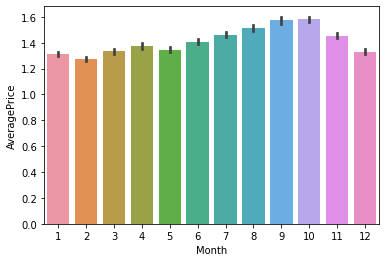

In [20]:
sns.barplot(x='Month', y='AveragePrice', data = data)

In the month 8-10, Average Price is more, but overall there is similarity in Average Price throughout the year.

<AxesSubplot:xlabel='year', ylabel='Total_Bags'>

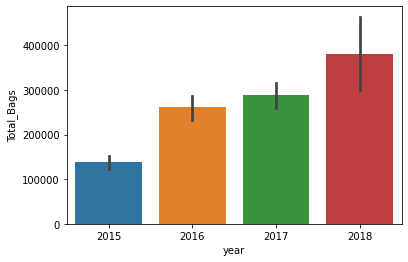

In [21]:
sns.barplot(x='year', y='Total_Bags', data = data)

<AxesSubplot:xlabel='year', ylabel='Total_Volume'>

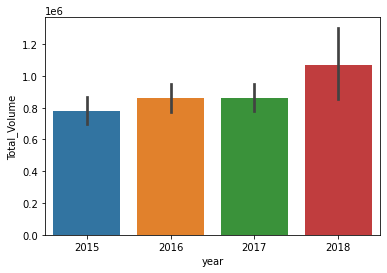

In [22]:
sns.barplot(x='year', y='Total_Volume', data = data)

According to Both, Total_Bags and Total_Volume graphs it can be seen that year 2018 has more demand than any other year.

<AxesSubplot:xlabel='type', ylabel='Total_Bags'>

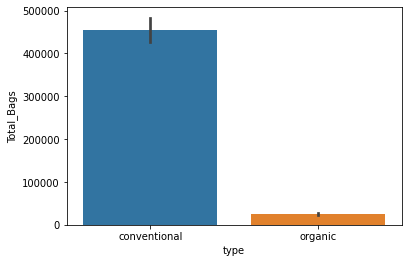

In [23]:
sns.barplot(x='type', y='Total_Bags', data = data)

<AxesSubplot:xlabel='type', ylabel='Total_Volume'>

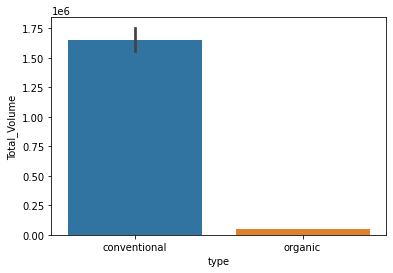

In [24]:
sns.barplot(x='type', y='Total_Volume', data = data)

The above graphs shows that, Conventional type Avocado is having more sales compared to Organic type.

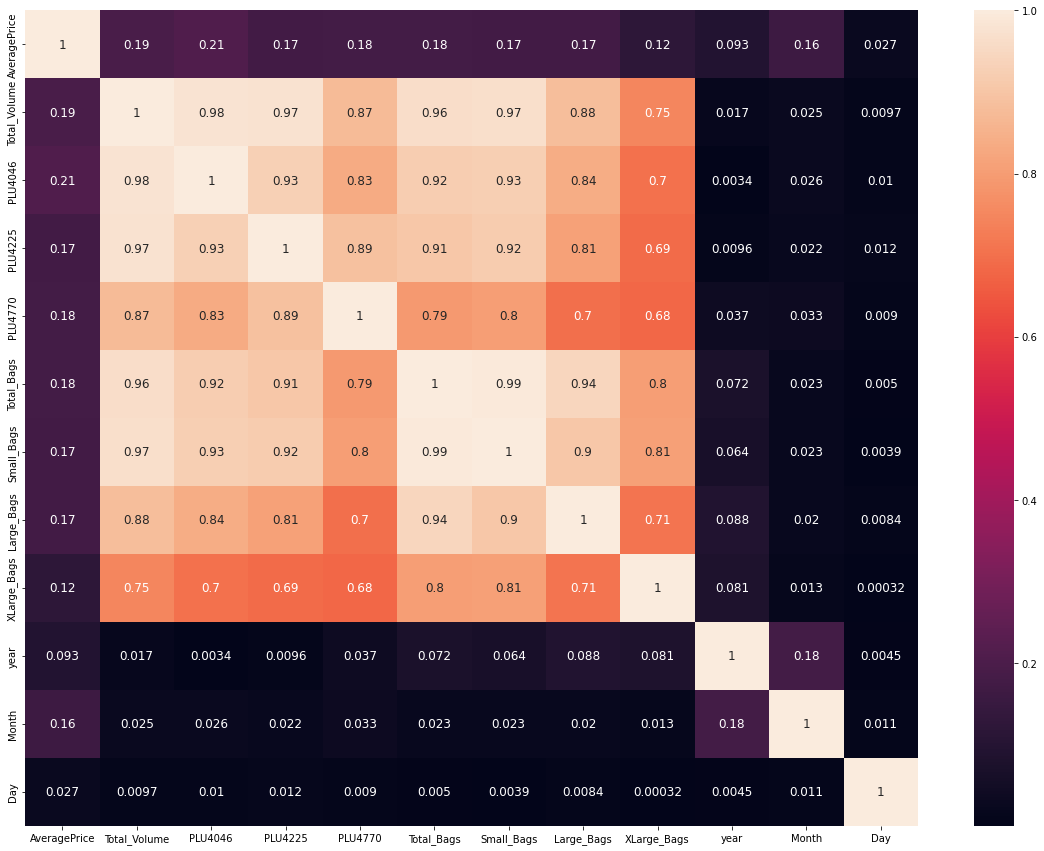

In [25]:
data_corr = data.corr().abs()

plt.figure(figsize = (20,15))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

Almost all the Columns have strong Correlation with each other. We will also check for multicollinearity using VIF.

We need to Encode the categorical column, type and region. Therefore, we will use Encoding methods for these columns.

In [26]:
data = data.drop(['Date'], axis=1)

data.head()

,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [27]:
data['type'] = pd.get_dummies(data['type'], drop_first = True)

data.head()

,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,29


In [28]:
# Encoding Dataset

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

elements = data.select_dtypes(include=['object']).columns

elements

Index(['region'], dtype='object')

In [29]:
for i in elements:
    data[i] = enc.fit_transform(data[i])

In [30]:
data.head()

,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


### Checking Skewness and Outliers

In [31]:
x = data.drop(['AveragePrice'], axis=1)
y = data['AveragePrice']

In [32]:
x.skew().sort_values(ascending = False)

XLarge_Bags     13.139751
PLU4770         10.159396
Large_Bags       9.796455
Total_Bags       9.756072
Small_Bags       9.540660
Total_Volume     9.007687
PLU4225          8.942466
PLU4046          8.648220
year             0.215339
Month            0.106617
Day              0.014310
type             0.000329
region           0.000030
dtype: float64

There is skewness present in the dataset. Therefore, we will use power transformation to remove skewness.

In [33]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [34]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

XLarge_Bags     0.793520
year            0.213156
PLU4770         0.032184
Total_Volume    0.011171
Small_Bags      0.007058
type            0.000329
Total_Bags     -0.001626
PLU4225        -0.017740
PLU4046        -0.022679
Large_Bags     -0.073809
Month          -0.146584
Day            -0.208462
region         -0.261443
dtype: float64

In [35]:
x = pd.DataFrame(x_new, columns = x.columns)

XLarge column has high skewness because number of zero values. therefore, we can use the transformed data even though the value is high.

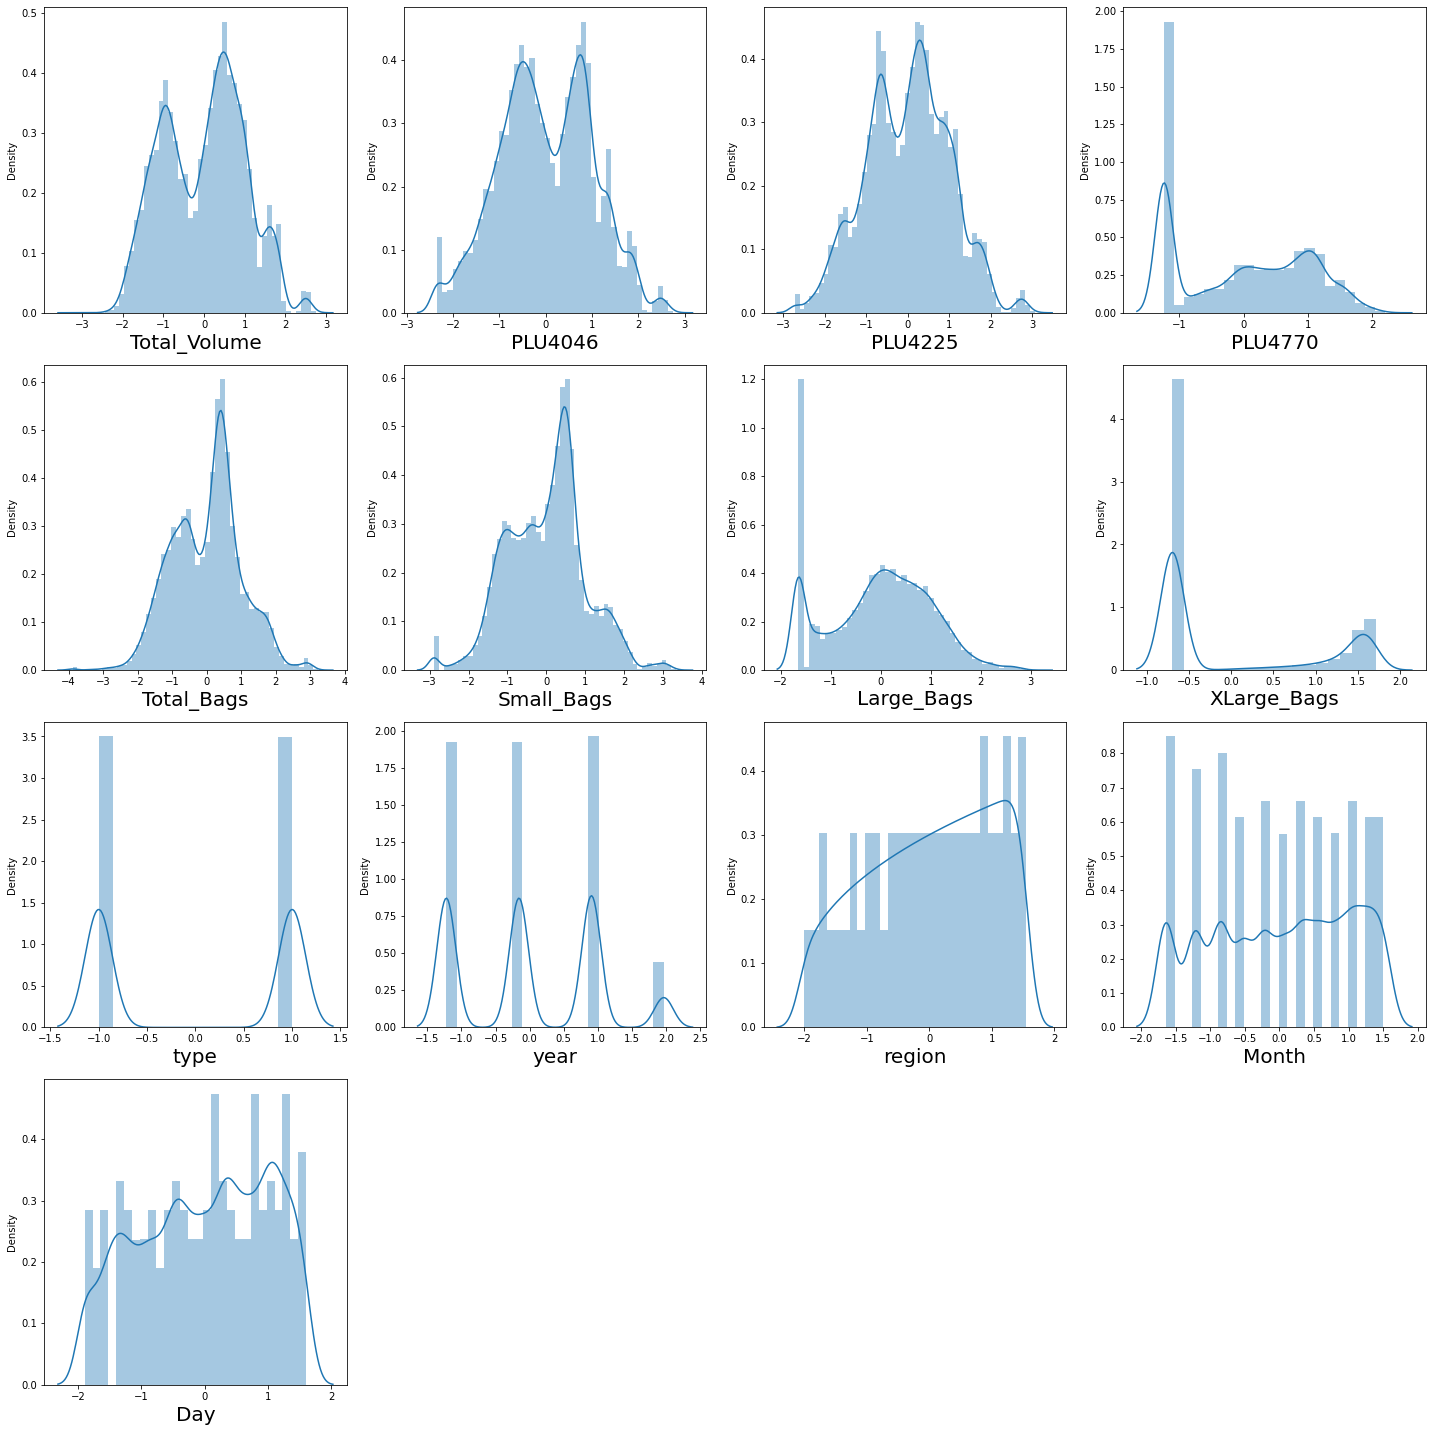

In [36]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

### Checking Outliers

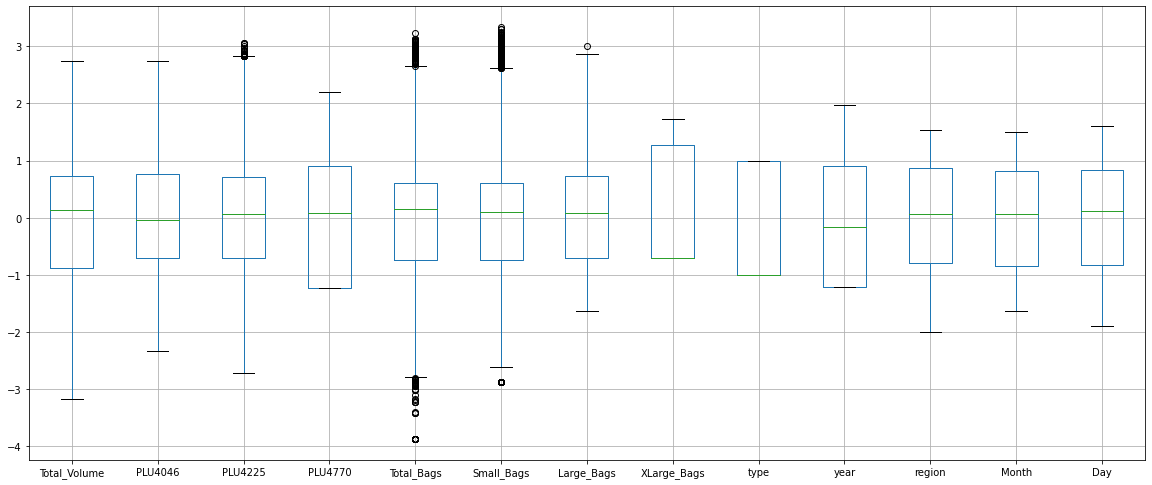

In [37]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

There are many outliers present in the columns, Therefore we need to remove the outliers before proceeding furthur.

In [38]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Total_Volume     True
PLU4046          True
PLU4225         False
PLU4770          True
Total_Bags      False
Small_Bags      False
Large_Bags      False
XLarge_Bags      True
type             True
year             True
region           True
Month            True
Day              True
dtype: bool
****************************************
Low Side Outliers Present
Total_Volume    False
PLU4046          True
PLU4225          True
PLU4770          True
Total_Bags      False
Small_Bags       True
Large_Bags       True
XLarge_Bags      True
type             True
year             True
region           True
Month            True
Day              True
dtype: bool


Features having outliers in High Side are: 1. PLU4225, 2.Total_Bags, 3. Small_Bags, 4. Large_Bags

Features having outliers in Low side are: 1. Total_Volume, 2. Total_Bags

In [39]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [40]:
PLU4225_high = q3.PLU4225 + (1.5 * iqr.PLU4225)

# Check the Indexes which have higher values

index1 = np.where(x['PLU4225']> PLU4225_high)

x = x.drop(x['PLU4225'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(18221, 13)
(18221,)


In [41]:
Total_Bags_high = q3.Total_Bags + (1.5 * iqr.Total_Bags)

# Check the Indexes which have higher values

index1 = np.where(x['Total_Bags']> Total_Bags_high)

x = x.drop(x['Total_Bags'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(18121, 13)
(18121,)


In [42]:
Small_Bags_high = q3.Small_Bags + (1.5 * iqr.Small_Bags)

# Check the Indexes which have higher values

index1 = np.where(x['Small_Bags']> Small_Bags_high)

x = x.drop(x['Small_Bags'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(18089, 13)
(18089,)


In [43]:
Large_Bags_high = q3.Large_Bags + (1.5 * iqr.Large_Bags)

# Check the Indexes which have higher values

index1 = np.where(x['Large_Bags']> Large_Bags_high)

x = x.drop(x['Large_Bags'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(18089, 13)
(18089,)


In [44]:
Total_Volume_low = q1.Total_Volume - (1.5 * iqr.Total_Volume)

# Check the Indexes which have higher values

index1 = np.where(x['Total_Volume']< Total_Volume_low)

x = x.drop(x['Total_Volume'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(18089, 13)
(18089,)


In [45]:
Total_Bags_low = q1.Total_Bags - (1.5 * iqr.Total_Bags)

# Check the Indexes which have higher values

index1 = np.where(x['Total_Bags']< Total_Bags_low)

x = x.drop(x['Total_Bags'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(18043, 13)
(18043,)


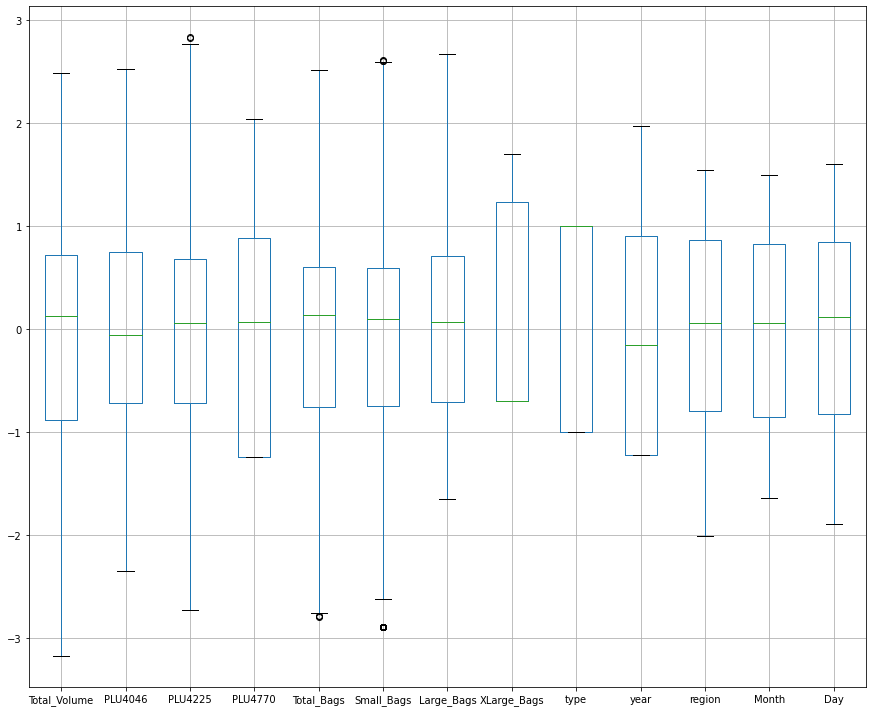

In [46]:
# checking Outliers

x.iloc[:,:].boxplot(figsize = (15,15))
plt.subplots_adjust(bottom = 0.25)
plt.show()

Now, the outliers are removed from the dataset. We can proceed furthur.

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,53.292762,Total_Volume
1,7.098240,PLU4046
2,10.922730,PLU4225
3,4.133752,PLU4770
4,34.315343,Total_Bags
5,14.614772,Small_Bags
6,3.348665,Large_Bags
7,2.120548,XLarge_Bags
8,3.717426,type
9,1.399313,year


Total_Volume and Total_Bags columns has VIF value = 53.29 & 34.31 respectively, which shows that these columns have strong correlation with other feature. therefore we need to remove the column.

First we will remove the Total_Volume column and check if it reduce the value for others.

In [49]:
x = x.drop(['Total_Volume'], axis=1)

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,3.862552,PLU4046
1,4.385965,PLU4225
2,4.114664,PLU4770
3,22.176728,Total_Bags
4,14.604473,Small_Bags
5,3.282153,Large_Bags
6,2.102938,XLarge_Bags
7,3.484966,type
8,1.394157,year
9,1.084173,region


Still the Total_Bags columns has VIF value = 22.17, therefore we need to remove the column.

In [52]:
x = x.drop(['Total_Bags'], axis=1)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,3.826954,PLU4046
1,4.206080,PLU4225
2,4.114626,PLU4770
3,4.093827,Small_Bags
4,1.918429,Large_Bags
5,2.102072,XLarge_Bags
6,3.478777,type
7,1.362120,year
8,1.084123,region
9,1.057128,Month


Now since the VIF values are below 10, we can assume that multicollinearity is removed from the Dataset.

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [56]:
max_r2_score = 0
maxRS = 0
model = [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor(), xgb.XGBRegressor()]
for r_state in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = r_state)
    for i in model:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        r2score = r2_score(y_test,y_pred)
        print('r2_score', r2score*100,'%', 'random_state', r_state, 'Model', i)
        if r2score > max_r2_score:
            max_r2_score = r2score
            maxRS = r_state
            final_model = i

            
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

r2_score 51.89034655207186 % random_state 1 Model LinearRegression()
r2_score 73.7486078619902 % random_state 1 Model DecisionTreeRegressor()
r2_score 78.44709025865033 % random_state 1 Model KNeighborsRegressor()
r2_score 88.3589371844294 % random_state 1 Model RandomForestRegressor()
r2_score 89.40161331206116 % random_state 1 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
      

r2_score 76.44557032538232 % random_state 9 Model KNeighborsRegressor()
r2_score 87.66137498081399 % random_state 9 Model RandomForestRegressor()
r2_score 88.75200706383447 % random_state 9 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 52.6344771110772 % random_state 10 Model LinearRegression()
r2_score 74.43981936935502 % random_state 10 M

r2_score 77.96897900758093 % random_state 17 Model KNeighborsRegressor()
r2_score 88.389753639099 % random_state 17 Model RandomForestRegressor()
r2_score 89.55601567256008 % random_state 17 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 52.59312419214801 % random_state 18 Model LinearRegression()
r2_score 74.76758429173411 % random_state 18

r2_score 77.27867340248339 % random_state 25 Model KNeighborsRegressor()
r2_score 88.39053795128964 % random_state 25 Model RandomForestRegressor()
r2_score 89.49260794744455 % random_state 25 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 51.70266986750072 % random_state 26 Model LinearRegression()
r2_score 76.00379946068762 % random_state 

r2_score 78.60262137325846 % random_state 33 Model KNeighborsRegressor()
r2_score 88.36166901186623 % random_state 33 Model RandomForestRegressor()
r2_score 89.69576601177445 % random_state 33 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 52.35246759165799 % random_state 34 Model LinearRegression()
r2_score 75.09955373576447 % random_state 

r2_score 76.7815908220441 % random_state 41 Model KNeighborsRegressor()
r2_score 87.5192588333297 % random_state 41 Model RandomForestRegressor()
r2_score 88.99867778869583 % random_state 41 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 52.113908250426796 % random_state 42 Model LinearRegression()
r2_score 75.85814055066308 % random_state 4

r2_score 78.77253179297075 % random_state 49 Model KNeighborsRegressor()
r2_score 88.66795270344156 % random_state 49 Model RandomForestRegressor()
r2_score 90.0719804542241 % random_state 49 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 52.14734223781695 % random_state 50 Model LinearRegression()
r2_score 75.10110111254448 % random_state 5

r2_score 78.13733422002976 % random_state 57 Model KNeighborsRegressor()
r2_score 88.57056231482197 % random_state 57 Model RandomForestRegressor()
r2_score 89.83802425575944 % random_state 57 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 52.40462955908987 % random_state 58 Model LinearRegression()
r2_score 75.97581157262536 % random_state 

r2_score 77.7688959956379 % random_state 65 Model KNeighborsRegressor()
r2_score 88.26603416940924 % random_state 65 Model RandomForestRegressor()
r2_score 89.68546703011184 % random_state 65 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 51.97984423283055 % random_state 66 Model LinearRegression()
r2_score 74.1076112707323 % random_state 66

r2_score 77.4433294870245 % random_state 73 Model KNeighborsRegressor()
r2_score 88.8752941001 % random_state 73 Model RandomForestRegressor()
r2_score 89.35943804026145 % random_state 73 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 52.11882846112857 % random_state 74 Model LinearRegression()
r2_score 75.03190724687676 % random_state 74 Mo

r2_score 77.75066051610902 % random_state 81 Model KNeighborsRegressor()
r2_score 88.51661851793993 % random_state 81 Model RandomForestRegressor()
r2_score 89.81019182079429 % random_state 81 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 50.042873841914016 % random_state 82 Model LinearRegression()
r2_score 75.61107966845478 % random_state

r2_score 78.13248458921214 % random_state 89 Model KNeighborsRegressor()
r2_score 88.11331499618635 % random_state 89 Model RandomForestRegressor()
r2_score 89.10589948947076 % random_state 89 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 51.490732745256466 % random_state 90 Model LinearRegression()
r2_score 74.31696700772183 % random_state

r2_score 77.95879158419416 % random_state 97 Model KNeighborsRegressor()
r2_score 88.62246966050947 % random_state 97 Model RandomForestRegressor()
r2_score 89.71064466075902 % random_state 97 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 51.09142390516601 % random_state 98 Model LinearRegression()
r2_score 74.07486404732491 % random_state 

r2_score 78.10712845958635 % random_state 105 Model KNeighborsRegressor()
r2_score 88.71983961950795 % random_state 105 Model RandomForestRegressor()
r2_score 89.9148667996811 % random_state 105 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 50.85716528192216 % random_state 106 Model LinearRegression()
r2_score 73.14824200183206 % random_sta

r2_score 77.97171436283269 % random_state 113 Model KNeighborsRegressor()
r2_score 88.22929238296304 % random_state 113 Model RandomForestRegressor()
r2_score 89.86806641865893 % random_state 113 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 52.03588638208468 % random_state 114 Model LinearRegression()
r2_score 77.09650825049393 % random_st

r2_score 78.2685456060144 % random_state 121 Model KNeighborsRegressor()
r2_score 88.91889264881715 % random_state 121 Model RandomForestRegressor()
r2_score 89.99441358145893 % random_state 121 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 51.45122831941187 % random_state 122 Model LinearRegression()
r2_score 76.58685390877523 % random_sta

r2_score 78.70640007291281 % random_state 129 Model KNeighborsRegressor()
r2_score 88.7288532069224 % random_state 129 Model RandomForestRegressor()
r2_score 89.82966799611265 % random_state 129 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 51.144442561094586 % random_state 130 Model LinearRegression()
r2_score 75.48308780152266 % random_st

r2_score 78.61764080966401 % random_state 137 Model KNeighborsRegressor()
r2_score 88.53688403430128 % random_state 137 Model RandomForestRegressor()
r2_score 90.07149680106625 % random_state 137 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 51.33533220970998 % random_state 138 Model LinearRegression()
r2_score 74.77541872035532 % random_st

r2_score 78.56582636613527 % random_state 145 Model KNeighborsRegressor()
r2_score 88.5409160325614 % random_state 145 Model RandomForestRegressor()
r2_score 89.9299627325299 % random_state 145 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 51.129905497143255 % random_state 146 Model LinearRegression()
r2_score 73.49725657918724 % random_sta

r2_score 78.35412357043691 % random_state 153 Model KNeighborsRegressor()
r2_score 88.73294322673078 % random_state 153 Model RandomForestRegressor()
r2_score 89.62869679477166 % random_state 153 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 52.43672276199428 % random_state 154 Model LinearRegression()
r2_score 73.59394859006937 % random_st

r2_score 78.56817396985805 % random_state 161 Model KNeighborsRegressor()
r2_score 88.7378656540076 % random_state 161 Model RandomForestRegressor()
r2_score 89.70786819904264 % random_state 161 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 52.06246129466556 % random_state 162 Model LinearRegression()
r2_score 74.38469319280834 % random_sta

r2_score 78.35573330591042 % random_state 169 Model KNeighborsRegressor()
r2_score 88.53699531239361 % random_state 169 Model RandomForestRegressor()
r2_score 89.95163827656955 % random_state 169 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 51.813326503027056 % random_state 170 Model LinearRegression()
r2_score 76.94933744994182 % random_s

r2_score 78.84518062458321 % random_state 177 Model KNeighborsRegressor()
r2_score 88.2827981889421 % random_state 177 Model RandomForestRegressor()
r2_score 89.72732605124443 % random_state 177 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 50.492664273763154 % random_state 178 Model LinearRegression()
r2_score 74.6909385525023 % random_sta

r2_score 77.47607331768384 % random_state 185 Model KNeighborsRegressor()
r2_score 88.55649431218862 % random_state 185 Model RandomForestRegressor()
r2_score 89.32388621505399 % random_state 185 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 52.2731908380196 % random_state 186 Model LinearRegression()
r2_score 76.39112424269065 % random_sta

r2_score 78.71770558452094 % random_state 193 Model KNeighborsRegressor()
r2_score 88.64276795863198 % random_state 193 Model RandomForestRegressor()
r2_score 90.1359317846968 % random_state 193 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 51.928569902273104 % random_state 194 Model LinearRegression()
r2_score 73.87364393280862 % random_st

In [57]:
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

max R2 score corresponds to random state:  20 is 0.9061125870347635 and Model is:  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


XGBRegressor is the best model with highest R2 Score, therefore we will perform Parameter tuning using GridSearchCV on XGBRegressor.

In [58]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 20)

import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

r2score = r2_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(xgb, x_scaled, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

R2 Score:  0.9061125870347635
Mean Squared Error:  0.01592082874645716
At CV: 2
Cross Validation Score is:  -48.8627263612038
R2_Score is :  0.9061125870347635
At CV: 3
Cross Validation Score is:  30.7452890024436
R2_Score is :  0.9061125870347635
At CV: 4
Cross Validation Score is:  28.89193217238162
R2_Score is :  0.9061125870347635
At CV: 5
Cross Validation Score is:  45.32522226052594
R2_Score is :  0.9061125870347635
At CV: 6
Cross Validation Score is:  39.08722089181614
R2_Score is :  0.9061125870347635
At CV: 7
Cross Validation Score is:  49.1985943365065
R2_Score is :  0.9061125870347635
At CV: 8
Cross Validation Score is:  52.11128475787604
R2_Score is :  0.9061125870347635
At CV: 9
Cross Validation Score is:  55.264000040713015
R2_Score is :  0.9061125870347635


In [59]:
cvscore_selected = cross_val_score(xgb, x_scaled, y, cv = 9).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.5526400004071301 
The R2_Score is:  0.9061125870347635


#### Parameter Tuning using GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : np.arange(10,100,10), 
              'max_depth': np.arange(1,21,5)}

grd = GridSearchCV(xgb, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

grd = grd.best_estimator_

grd.fit(x_train, y_train)
y_pred = grd.predict(x_test)


print('R2 Score: ', grd.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best Param ==> {'max_depth': 11, 'n_estimators': 90}
R2 Score:  0.9061125870347635
Mean Squared Error:  0.01592082874645716


Text(0, 0.5, 'Predicted_y')

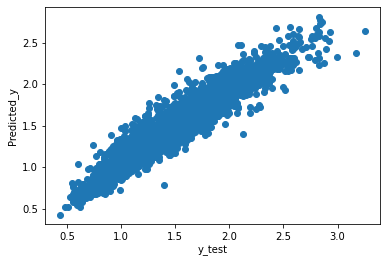

In [61]:
# Actual Vs Predicted Graph
plt.scatter(x=y_test, y=y_pred)
plt.xlabel('y_test')
plt.ylabel('Predicted_y')

The above graph looks almost like a straight line graph, which shows a very good relation betweeen actual Vs predicted values.

# Prediction with Region

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [63]:
x_c = data.drop(columns = ['region'])
y_c = data[['region']]

print(x_c.shape)
print(y_c.shape)

(18249, 13)
(18249, 1)


In [64]:
scaler = StandardScaler()

xc_scaled = scaler.fit_transform(x_c)

In [65]:
xc_scaled

array([[-0.18868864, -0.22771641, -0.23081597, ..., -1.22128204,
         1.64763162,  1.29185687],
       [-0.13901962, -0.23042664, -0.23110251, ..., -1.22128204,
         1.64763162,  0.49423066],
       [-1.18206895, -0.21208462, -0.23100731, ..., -1.22128204,
         1.64763162, -0.30339555],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ...,  1.97050371,
        -1.46495942,  0.60817726],
       [ 1.30138182, -0.24162464, -0.2304279 , ...,  1.97050371,
        -1.46495942, -0.18944895],
       [ 0.53151208, -0.24125273, -0.22934712, ...,  1.97050371,
        -1.46495942, -0.98707516]])

In [66]:
y_c

,region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [68]:
maxAccu = 0
maxRS = 0

model = [LogisticRegression(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         KNeighborsClassifier(),
         xgb.XGBClassifier()]

for rs in range(1,100):
    xc_train, xc_test, yc_train, yc_test = train_test_split(xc_scaled, y_c, test_size = 0.25, random_state = rs)
    for ic in model:
        ic.fit(xc_train, yc_train)
        yc_pred = ic.predict(xc_test)
        acc = accuracy_score(yc_test,yc_pred)
        print('Accuracy score', acc, 'random_state', rs, 'Model', ic)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = rs
            final_model = ic
            
        
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', ic)

Accuracy score 0.3278544817006355 random_state 1 Model LogisticRegression()
Accuracy score 0.9092702169625246 random_state 1 Model RandomForestClassifier()
Accuracy score 0.7992548761779531 random_state 1 Model DecisionTreeClassifier()
Accuracy score 0.14770984001753232 random_state 1 Model KNeighborsClassifier()
Accuracy score 0.8897655051501205 random_state 1 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='

Accuracy score 0.32215647600262987 random_state 9 Model LogisticRegression()
Accuracy score 0.908612754766601 random_state 9 Model RandomForestClassifier()
Accuracy score 0.7898312513697129 random_state 9 Model DecisionTreeClassifier()
Accuracy score 0.1317115932500548 random_state 9 Model KNeighborsClassifier()
Accuracy score 0.8753013368397984 random_state 9 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='m

Accuracy score 0.3320184089414859 random_state 17 Model LogisticRegression()
Accuracy score 0.913434144203375 random_state 17 Model RandomForestClassifier()
Accuracy score 0.7937760245452553 random_state 17 Model DecisionTreeClassifier()
Accuracy score 0.1448608371685295 random_state 17 Model KNeighborsClassifier()
Accuracy score 0.893491124260355 random_state 17 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective

Accuracy score 0.3230330922638615 random_state 25 Model LogisticRegression()
Accuracy score 0.9088319088319088 random_state 25 Model RandomForestClassifier()
Accuracy score 0.7999123383738769 random_state 25 Model DecisionTreeClassifier()
Accuracy score 0.13872452333990795 random_state 25 Model KNeighborsClassifier()
Accuracy score 0.8829717291255753 random_state 25 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, object

Accuracy score 0.3285119438965593 random_state 33 Model LogisticRegression()
Accuracy score 0.9099276791584484 random_state 33 Model RandomForestClassifier()
Accuracy score 0.7911461757615603 random_state 33 Model DecisionTreeClassifier()
Accuracy score 0.14025860179706334 random_state 33 Model KNeighborsClassifier()
Accuracy score 0.886259040105194 random_state 33 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objecti

Accuracy score 0.32763532763532766 random_state 41 Model LogisticRegression()
Accuracy score 0.908612754766601 random_state 41 Model RandomForestClassifier()
Accuracy score 0.7863247863247863 random_state 41 Model DecisionTreeClassifier()
Accuracy score 0.1415735261889108 random_state 41 Model KNeighborsClassifier()
Accuracy score 0.8847249616480386 random_state 41 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objecti

Accuracy score 0.32741617357001973 random_state 49 Model LogisticRegression()
Accuracy score 0.9121192198115275 random_state 49 Model RandomForestClassifier()
Accuracy score 0.792022792022792 random_state 49 Model DecisionTreeClassifier()
Accuracy score 0.1376287530133684 random_state 49 Model KNeighborsClassifier()
Accuracy score 0.8906421214113521 random_state 49 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objecti

Accuracy score 0.3247863247863248 random_state 57 Model LogisticRegression()
Accuracy score 0.9149682226605304 random_state 57 Model RandomForestClassifier()
Accuracy score 0.7979399517861057 random_state 57 Model DecisionTreeClassifier()
Accuracy score 0.1317115932500548 random_state 57 Model KNeighborsClassifier()
Accuracy score 0.8847249616480386 random_state 57 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objecti

Accuracy score 0.3245671707210169 random_state 65 Model LogisticRegression()
Accuracy score 0.9156256848564541 random_state 65 Model RandomForestClassifier()
Accuracy score 0.8010081087004164 random_state 65 Model DecisionTreeClassifier()
Accuracy score 0.1452991452991453 random_state 65 Model KNeighborsClassifier()
Accuracy score 0.8919570458031997 random_state 65 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objecti

Accuracy score 0.3265395573087881 random_state 73 Model LogisticRegression()
Accuracy score 0.9062020600482139 random_state 73 Model RandomForestClassifier()
Accuracy score 0.7959675651983344 random_state 73 Model DecisionTreeClassifier()
Accuracy score 0.1396011396011396 random_state 73 Model KNeighborsClassifier()
Accuracy score 0.8831908831908832 random_state 73 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objecti

Accuracy score 0.3179925487617795 random_state 81 Model LogisticRegression()
Accuracy score 0.9015998246767477 random_state 81 Model RandomForestClassifier()
Accuracy score 0.789612097304405 random_state 81 Model DecisionTreeClassifier()
Accuracy score 0.13521805829498137 random_state 81 Model KNeighborsClassifier()
Accuracy score 0.8799035722112645 random_state 81 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objecti

Accuracy score 0.32588209511286437 random_state 89 Model LogisticRegression()
Accuracy score 0.9112426035502958 random_state 89 Model RandomForestClassifier()
Accuracy score 0.7985974139820293 random_state 89 Model DecisionTreeClassifier()
Accuracy score 0.13543721236028927 random_state 89 Model KNeighborsClassifier()
Accuracy score 0.8882314266929652 random_state 89 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objec

Accuracy score 0.31229454306377386 random_state 97 Model LogisticRegression()
Accuracy score 0.9042296734604427 random_state 97 Model RandomForestClassifier()
Accuracy score 0.7869822485207101 random_state 97 Model DecisionTreeClassifier()
Accuracy score 0.14135437212360288 random_state 97 Model KNeighborsClassifier()
Accuracy score 0.8768354152969537 random_state 97 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objec

In [69]:
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', ic)

Max Accuracy score is 0.9200087661626123 at random_state 99 for Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)


In [72]:
from sklearn.model_selection import cross_val_score

xc_train, xc_test, yc_train, yc_test = train_test_split(xc_scaled, y_c, test_size = 0.25, random_state = 99)

import xgboost as xgb
xgb = xgb.XGBClassifier()

xgb.fit(xc_train, yc_train)

yc_pred = xgb.predict(xc_test)

print('Accuracy Score: ', accuracy_score(yc_test, yc_pred))

for i in range (2,10):
    cvscore = cross_val_score(xgb, xc_scaled, y_c, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy_Score is : ", accuracy_score(yc_test, yc_pred))

Accuracy Score:  0.8825334209949595
At CV: 2
Cross Validation Score is:  1.9781938947709792
Accuracy_Score is :  0.8825334209949595
At CV: 3
Cross Validation Score is:  49.399967121486114
Accuracy_Score is :  0.8825334209949595
At CV: 4
Cross Validation Score is:  56.9398831383285
Accuracy_Score is :  0.8825334209949595
At CV: 5
Cross Validation Score is:  63.909224895542785
Accuracy_Score is :  0.8825334209949595
At CV: 6
Cross Validation Score is:  64.50114920759698
Accuracy_Score is :  0.8825334209949595
At CV: 7
Cross Validation Score is:  72.20121650501397
Accuracy_Score is :  0.8825334209949595
At CV: 8
Cross Validation Score is:  73.01743367551403
Accuracy_Score is :  0.8825334209949595
At CV: 9
Cross Validation Score is:  72.97291949866805
Accuracy_Score is :  0.8825334209949595


In [73]:
cvscore_selected = cross_val_score(xgb, xc_scaled, y_c, cv = 8).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy_Score is: ", accuracy_score(yc_test, yc_pred))

The CV Score is:  0.7301743367551403 
The R2_Score is:  0.8825334209949595


#### Parameter Tuning using GridSearchCV

In [75]:
# HyperParameter Tuning

param_grid = {'n_estimators' : np.arange(10,100,10), 
              'max_depth': np.arange(1,21,5)}

grd = GridSearchCV(xgb, param_grid = param_grid)
grd.fit(xc_train, yc_train)

print('Best Param ==>', grd.best_params_)

clf = grd.best_estimator_      # reinstiating with best parameters

clf.fit(xc_train, yc_train)
yc_pred = clf.predict(xc_test)

xgb_conf_mat = confusion_matrix(yc_test, yc_pred)

print('\nconf_mat ==>', '\n', xgb_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(yc_test, yc_pred))

Best Param ==> {'max_depth': 11, 'n_estimators': 90}

conf_mat ==> 
 [[66  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  1]
 [ 0  0 70 ...  0  0  1]
 ...
 [ 0  0  0 ... 87  2  0]
 [ 0  0  0 ...  0 73  0]
 [ 0  1  1 ...  0  0 76]]

Accuracy rf Normal ==> 
 0.8774928774928775


In [80]:
# auc roc plot
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        71
           1       0.72      0.74      0.73        78
           2       0.95      0.86      0.90        81
           3       0.87      0.83      0.85        95
           4       0.94      0.93      0.94        86
           5       0.87      0.82      0.84        83
           6       0.96      0.99      0.97        79
           7       0.86      0.96      0.91        70
           8       0.99      0.94      0.97        89
           9       0.78      0.84      0.81        75
          10       0.72      0.77      0.75        82
          11       0.90      0.94      0.92        89
          12       0.90      0.94      0.92        81
          13       0.78      0.83      0.81        83
          14       0.89      0.92      0.91        74
          15       0.97      0.99      0.98        79
          16       0.99      0.91      0.95        97
          17       0.92    

Final Accuracy is: 88% and the Best Model is XGBoost.

In [82]:
pred_prob = xgb.predict_proba(xc_test)[:,1]

pred_prob

array([2.3506154e-05, 2.5573806e-06, 1.8577289e-04, ..., 1.1448334e-05,
       3.4998633e-05, 1.0856975e-05], dtype=float32)

In [84]:
fpr, tpr, thresholds = roc_curve(yc_test, pred_prob, pos_label = True)

print(fpr)
print('*******')
print(tpr)
print('*******')
print(thresholds)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.22965440e-04
 2.22965440e-04 6.68896321e-04 6.68896321e-04 1.11482720e-03
 1.11482720e-03 1.33779264e-03 1.33779264e-03 1.56075808e-03
 1.56075808e-03 2.45261984e-03 2.45261984e-03 3.79041249e-03
 3.79041249e-03 4.01337793e-03 4.01337793e-03 5.12820513e-03
 5.12820513e-03 5.35117057e-03 5.35117057e-03 7.58082497e-03
 7.58082497e-03 8.24972129e-03 8.24972129e-03 8.47268673e-03
 8.47268673e-03 1.09253066e-02 1.09253066e-02 1.13712375e-02
 1.13712375e-02 1.20401338e-02 1.20401338e-02 1.33779264e-02
 1.33779264e-02 2.87625418e-02 2.87625418e-02 3.01003344e-02
 3.01003344e-02 3.52285396e-02 3.52285396e-02 5.10590858e-02
 5.10590858e-02 1.15942029e-01 1.15942029e-01 1.34894091e-01
 1.34894091e-01 1.00000000e+00]
*******
[0.         0.01282051 0.46153846 0.46153846 0.5        0.5
 0.57692308 0.57692308 0.61538462 0.61538462 0.64102564 0.64102564
 0.73076923 0.73076923 0.74358974 0.74358974 0.75641026 0.75641026
 0.76923077 0.76923077 0.80769231 

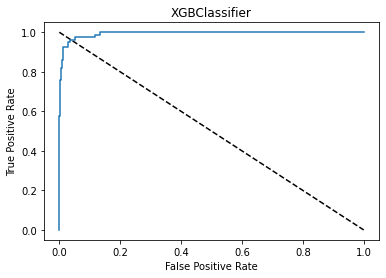

In [85]:
plt.plot([0,1],[1,0], 'k--')
plt.plot(fpr, tpr, label = "XGBClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBClassifier')
plt.show()

In [81]:
# Saving the Model

import joblib
joblib.dump(xgb, "Avocado_Project.pkl")

['Avocado_Project.pkl']